In [3]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.constants import c 
__C_LIGHT_KMS__ = c.to('km/s').value
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089)
import os
plt.style.use(['seaborn-v0_8-deep', os.environ['HOME'] + '/.matplotlib_style/paper.mplstyle'])
import scipy.stats as scs
from pathlib import Path
import sys
sys.path.append('/global/homes/b/bastienc/')
sys.path.append('../scripts/')
import snanapytools as snt
import my_utils as mut
import paper_fun as pf

PIPPIN_DIR = Path(os.environ['PIPPIN_OUTPUT'])
UCHUU_PATH = Path('/global/homes/b/bastienc/MY_SNANA_DIR/UchuuCatalogs/UchuuDR2_UM/mocks')

[ 000000.00 ]: 05-06 10:45  root            INFO     No pypower module detected, gridding with this method is unavailable
[ 000000.00 ]: 05-06 10:45  root            INFO     Jax is not available, loading numpy and scipy instead


In [2]:
mock = 0    
model = 'G10'
MOCK_DIR = PIPPIN_DIR / f'LSST_UCHUU_MOCK{mock:02d}_BC'
SIM_DIR = MOCK_DIR / '1_SIM' / f'LSST_{model}'
SIM_DIR /= f'PIP_LSST_UCHUU_MOCK00_BC_LSST_{model}'
FIT_DIR =  MOCK_DIR / '2_LCFIT'
UCHUU_MOCKS = UCHUU_PATH / 'mocks_z0p00_zmax0p1739_GalMag_SNANA/'

BBC_DIR = MOCK_DIR / f'6_BIASCOR/LSST_{model}/output'
BBC_FILE = BBC_DIR / f'OUTPUT_BBCFIT/FITOPT000_MUOPT000.FITRES.gz'
FIT_FILE = FIT_DIR /  f'LSST_FIT_LSST_{model}/output/PIP_LSST_UCHUU_MOCK{mock:02d}_BC_LSST_{model}/FITOPT000.FITRES.gz'


In [13]:
full_mock = pd.read_parquet(UCHUU_MOCKS / f'UchuuDR2_UM_z0p00_zmax0p1739_mock_{mock:02d}_SNANA.parquet')

In [3]:
bbc = ascii.read(BBC_FILE).to_pandas()

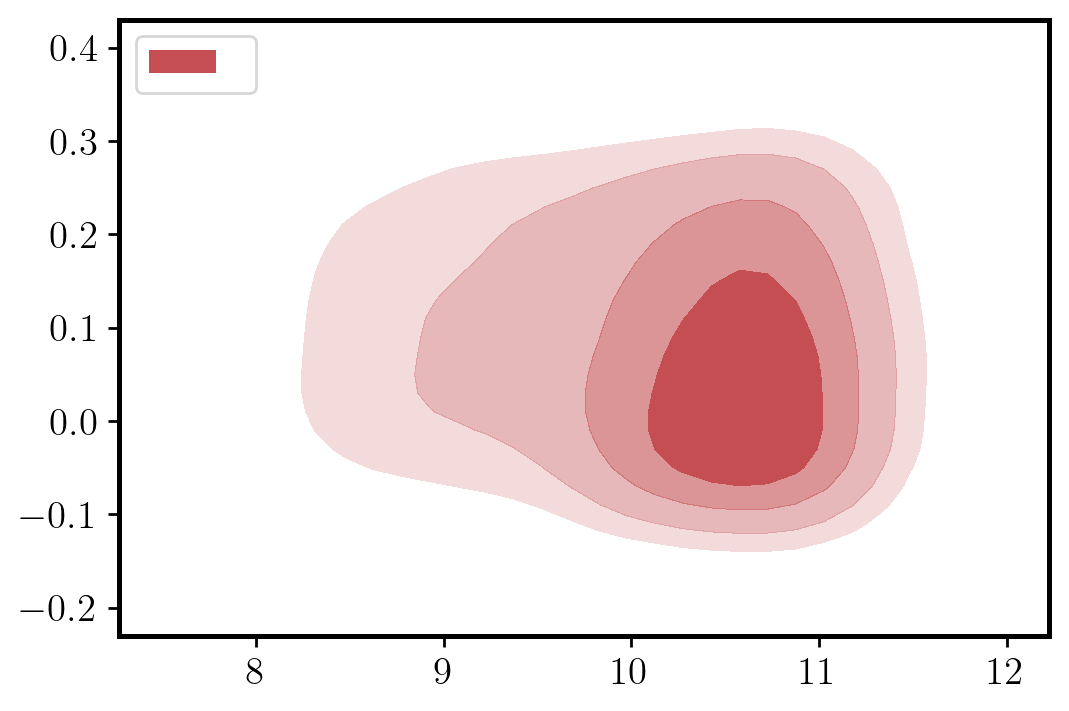

In [4]:
fig, ax = plt.subplots(dpi=200)
mut.plots.plot_density(bbc['HOST_LOGMASS'].values, bbc['SIM_c'].values, xrange=[7.5, 12], yrange=[-0.2, 0.4], bins_2d=31, ax=ax, add_txt='', 
                               levels=[0.25, 0.5, 0.75, 0.9], smooth=1.5, color='C2');

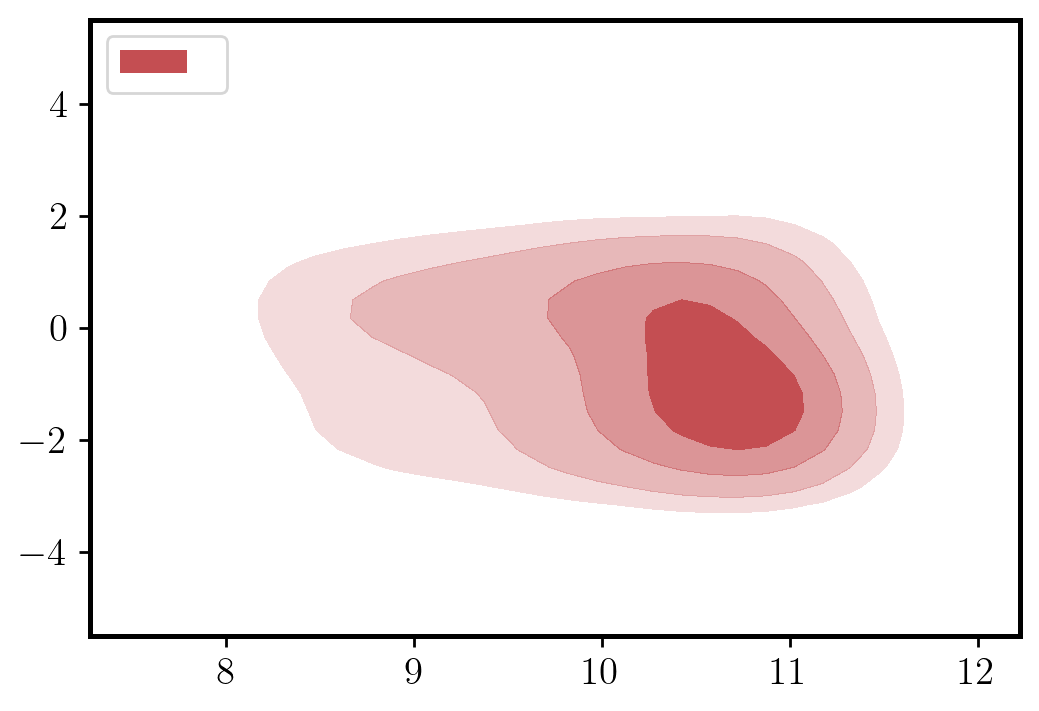

In [5]:
fig, ax = plt.subplots(dpi=200)
mut.plots.plot_density(bbc['HOST_LOGMASS'].values, bbc['SIM_x1'].values, xrange=[7.5, 12], yrange=[-5, 5], bins_2d=31, ax=ax, add_txt='', 
                               levels=[0.25, 0.5, 0.75, 0.9], smooth=1.5, color='C2');

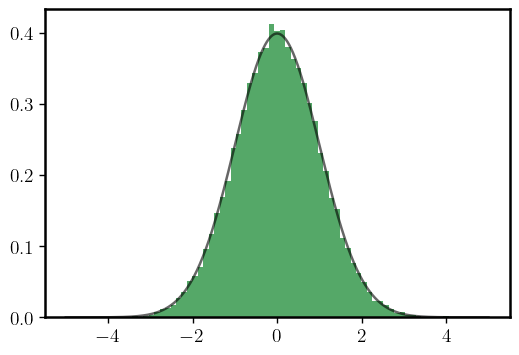

In [6]:
plt.hist((bbc['MU'] - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25) / bbc['MUERR'], bins='rice', density=True);
plt.hist((bbc['MU'] - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25) / bbc['MUERR'], bins='rice', density=True);

xth = np.linspace(-5, 5, 1000)
plt.plot(xth, scs.norm().pdf(xth), c='k', alpha=0.6);

In [11]:
fitres = ascii.read(FIT_FILE).to_pandas()

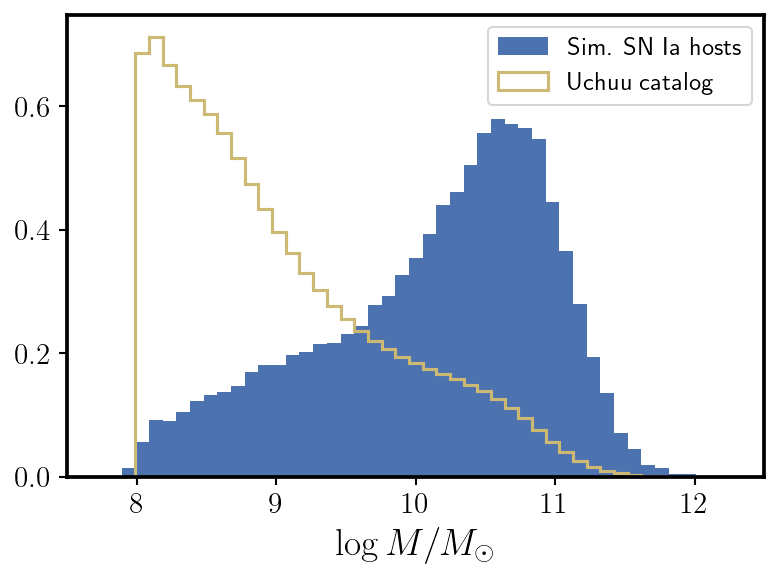

In [14]:
Mrange = [7.5, 12.5]
nbins=51
plt.figure(dpi=150)
plt.hist(fitres['HOST_LOGMASS'],range=Mrange, density=True,bins=nbins, histtype='stepfilled',label='Sim. SN Ia hosts' )
plt.hist(full_mock.LOGMASS, range=Mrange, density=True, bins=nbins, histtype='step', lw=1.5, color='C4',label='Uchuu catalog' )
plt.xlabel('$\log M / M_\odot$')
plt.xlim(*Mrange)
plt.legend()
plt.savefig('../Figures/Host_Massdist.pdf',dpi=None, bbox_inches='tight' );

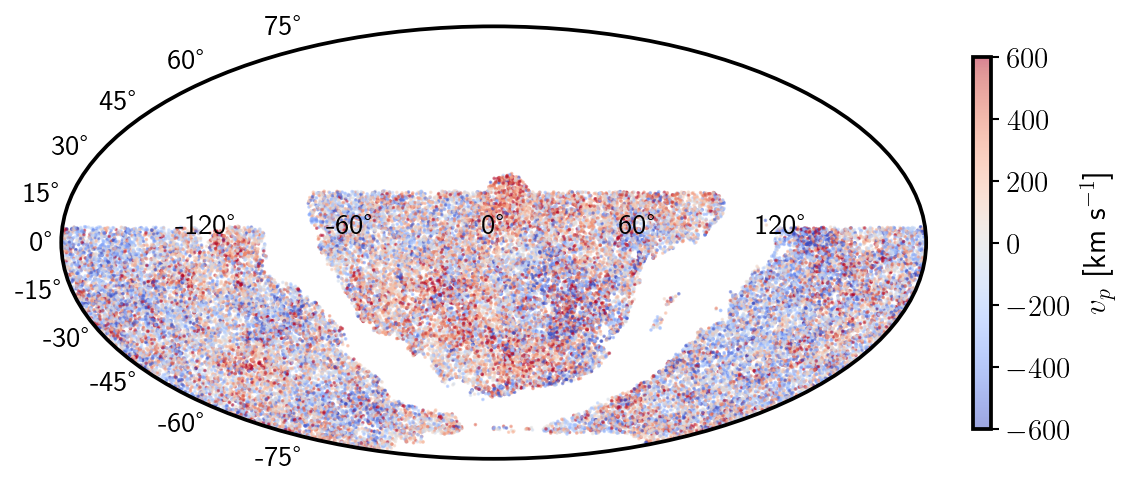

In [15]:
# Set up the Mollweide projectionD
fig = plt.figure(figsize=(8, 5), dpi=150)
ax = fig.add_subplot(111, projection='mollweide')
# Generate some example data
p = ax.scatter(*np.radians([fitres['HOST_RA'] - 180, fitres['HOST_DEC']]), c=fitres['SIM_VPEC'],
           cmap='coolwarm' ,s=0.5, vmin=-600, vmax=600, alpha=0.5)
cbar = fig.colorbar(p, fraction=0.02, label='$v_p$ [km s$^{-1}$]')
cbar.ax.set_ylabel(cbar.ax.get_ylabel(), fontsize=15)
# Customize the ticks
ticks = np.linspace(-120, 120, 5)  # Original tick positions
tick_labels = [f"{np.round(t):.0f}°" for t in ticks]  # Convert to degrees

# Set the custom ticks
ax.set_xticks(np.radians(ticks))
ax.set_xticklabels(tick_labels);
plt.savefig('../Figures/sn_loc.png', dpi=400, bbox_inches='tight')

In [ ]:
len(fitres['zHD'])

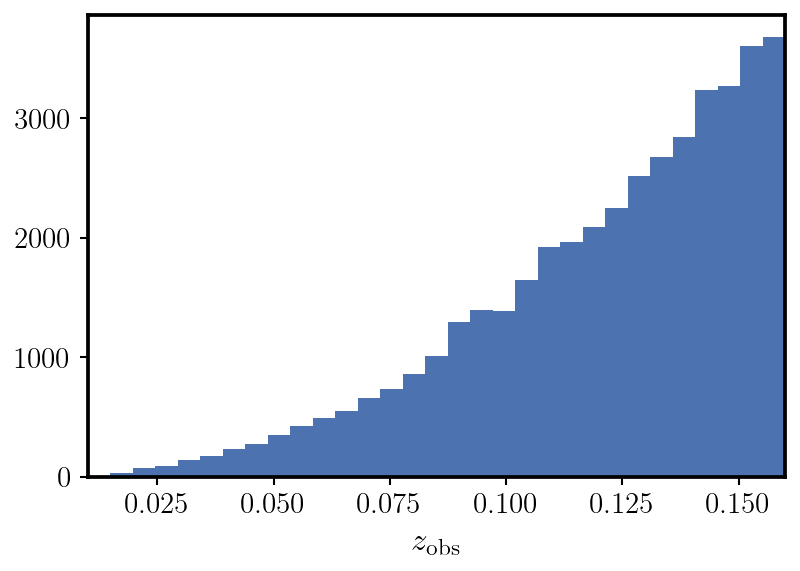

In [16]:
plt.figure(dpi=150)

plt.hist(fitres['zHD'], bins=31, range=[0.01,0.16]);
plt.xlim(0.01, 0.16)
plt.xlabel('$z_\mathrm{obs}$', fontsize=16)
plt.savefig('z.png', dpi=300, bbox_inches='tight')

# Parameters dist

In [1]:
from snanapytools import utils as ut
import matplotlib.colors as mpc
import matplotlib.cm as cm

## RND, G10, C11

In [4]:
file = os.environ['SNDATA_ROOT'] + '/models/population_pdf/DES-SN5YR/DES-SN5YR_LOWZ_S3_G10.DAT.gz'
par = snt.tools.read_wgtmap(file)

mass_grp_c = par['SALT2c'].groupby('LOGMASS')
mass_grp_x1 = par['SALT2x1'].groupby('LOGMASS')

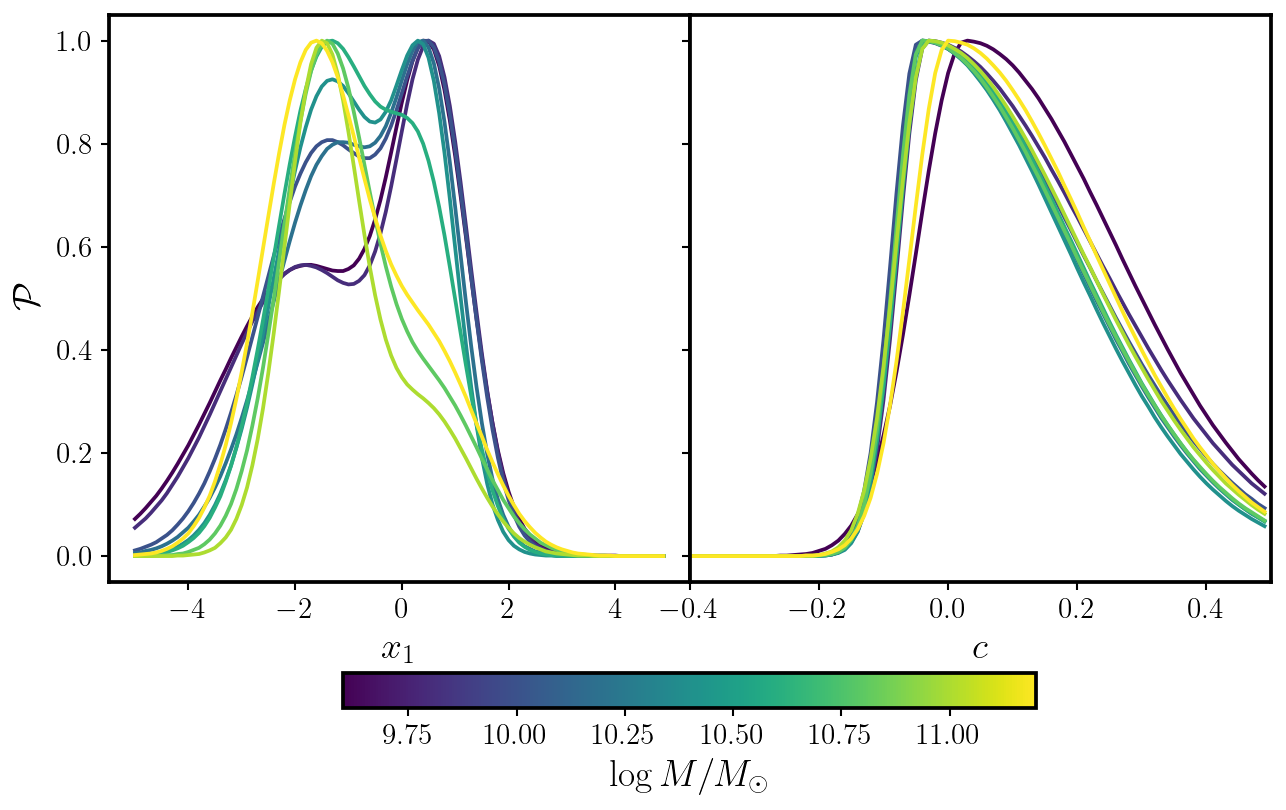

In [10]:
vmin = np.min([np.min(list(mass_grp_c.groups.keys())), np.min(list(mass_grp_x1.groups.keys()))])
vmax = np.max([np.max(list(mass_grp_c.groups.keys())), np.max(list(mass_grp_x1.groups.keys()))])
norm = mpc.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.viridis 
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar, even if no data is associated


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6), dpi=150)


# Plot the first subplot
for g in mass_grp_x1:
    ax1.plot(g[1].SALT2x1, g[1].PROB, c=cmap(norm(g[0])))
    
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel(r'$\mathcal{P}$', fontsize=18)

# Plot the second subplot
for g in mass_grp_c:
    ax2.plot(g[1].SALT2c, g[1].PROB, c=cmap(norm(g[0])))
    
ax2.set_xlabel("$c$", fontsize=18)
ax2.set_xlim(-0.4,0.5)

# Add a horizontal colorbar below the plots
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", fraction=0.05, pad=10)
cbar.set_label(r"$\log M / M_\odot$",  fontsize=18)

fig.subplots_adjust(wspace=0., bottom=0.25) 
plt.savefig('dist.pdf', dpi=300)

## P23

In [ ]:
file = os.environ['SNDATA_ROOT'] + '/models/population_pdf/DES-SN5YR/DES-SN5YR_LOWZ_S3_P21.DAT.gz'
par = snt.tools.read_wgtmap(file)

mass_grp_x1 = par['SALT2x1'].groupby('LOGMASS')
mass_grp_rv = par['RV'].groupby('LOGMASS')
mass_grp_ebv = par['EBV'].groupby('LOGMASS')

In [ ]:
plt.figure(dpi=200)
g = mass_grp_ebv.get_group(5)
for gz in g.groupby('ZTRUE'):
    plt.plot(gz[1].EBV, gz[1].PROB)
    
plt.xlim(0, 0.4)

In [ ]:
g1.PROB.values == g2.PROB.values

In [ ]:
gz.groups.keys()


In [8]:
gz.get_group(0.1).groupby

NameError: name 'gz' is not defined

In [9]:
c_th = np.linspace(-0.5, 0.5, 10000)
P = np.interp(c_th, par['SALT2c'].SALT2c.values, par['SALT2c'].PROB.values)
P /= np.trapz(P, x=c_th) 

mu = np.trapz(P * c_th, x=c_th) 
mu2 = np.trapz(P * c_th**2, x=c_th) 
print(mu)
print(np.sqrt(mu2 - mu**2))

NameError: name 'par' is not defined

In [10]:
vmin = np.min([np.min(list(mass_grp_c.groups.keys())), np.min(list(mass_grp_x1.groups.keys()))])
vmax = np.max([np.max(list(mass_grp_c.groups.keys())), np.max(list(mass_grp_x1.groups.keys()))])
norm = mpc.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.viridis 
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar, even if no data is associated


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True, figsize=(10, 8), dpi=150)


# Plot the first subplot
for g in mass_grp_x1:
    ax1[0].plot(g[1].SALT2x1, g[1].PROB, c=cmap(norm(g[0])))
    
ax1[0].set_xlabel("$x_1$", fontsize=15)
ax1[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)

# Plot the second subplot
ax1[1].plot(par['SALT2c'].SALT2c, par['SALT2c'].PROB)
    
ax1[1].set_xlabel("$c$", fontsize=15)

# Plot the first subplot
for g in mass_grp_rv:
    ax2[0].plot(g[1].RV, g[1].PROB, c=cmap(norm(g[0])))

ax2[0].set_xlabel("$R_V$", fontsize=15)
ax2[0].axvline(3.25)
ax2[0].axvline(3.25+0.93)
ax2[0].axvline(1.66)

ax2[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)


# Plot the first subplot
for g in mass_grp_ebv:
    i = 0
    for gg in g[1].groupby('ZTRUE'):
        ax2[1].plot(gg[1].EBV, gg[1].PROB, c=cmap(norm(g[0])), label=f'z={gg[0]}')
        i+=1
        
ax2[0].set_xlabel("$R_V$", fontsize=15)
ax2[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)
plt.legend()

# Add a horizontal colorbar below the plots
cbar = fig.colorbar(sm, ax=[*ax2], orientation="horizontal", fraction=0.08, pad=0.5)
cbar.set_label(r"$\log M / M_\odot$",  fontsize=15)

fig.subplots_adjust(wspace=0., bottom=0.2,) 

NameError: name 'mass_grp_c' is not defined

In [3]:
from astropy.constants import c as ast_c

_CLIGHT_KMS_ = ast_c.to('km/s').value

In [4]:
_CLIGHT_KMS_ * 0.12 * 0.17 * np.log(10) / 5

2816.4143907140015

In [3]:
from astropy.io import fits

In [4]:
d= fits.open('/pscratch/sd/d/desctd/PIPPIN_OUTPUT/LSST_UCHUU_MOCK07_BBC_BC/1_SIM/LSST_RNDSMEAR_BBC/PIP_LSST_UCHUU_MOCK07_BBC_BC_LSST_RNDSMEAR_BBC/PIP_LSST_UCHUU_MOCK07_BBC1977b_SNIaMODEL00-0001_HEAD.FITS.gz')

(array([55665.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 55471.]),
 array([0.1       , 0.11      , 0.12      , 0.13      , 0.14      ,
        0.15000001, 0.16      , 0.17      , 0.18000001, 0.19      ,
        0.2       ]),
 <BarContainer object of 10 artists>)

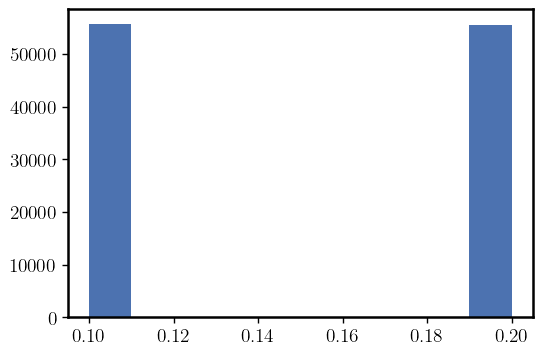

In [17]:
plt.hist(d[1].data['SIM_SALT2alpha'])

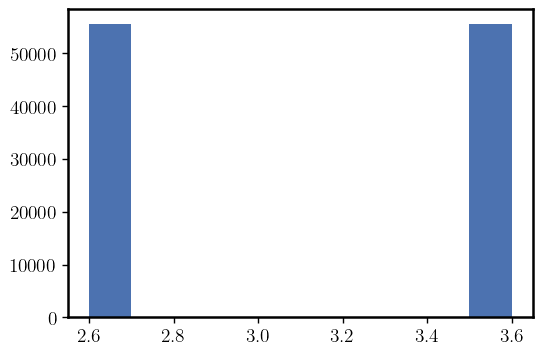

In [22]:
plt.hist(d[1].data['SIM_SALT2beta']);

In [23]:
len(d[1].data['SIM_SALT2beta'])

111136

In [24]:
sim.head[sim.head['NOBS'] > 50]

,FAKE,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,...,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_SUBSAMPLE_INDEX,PHOT_FILE
SNID,,,,,,,,,,,,,,,,,,,,,
22,2,37.799600,-70.364857,0.2,-9,-9,1,72,149,220,...,1.0,1.0,0.882312,0.628296,1.287915,2.105212,4.245810e+00,5.044674e-44,-9,0
24,2,145.922955,-27.771044,0.2,-9,-9,1,59,257,315,...,1.0,1.0,0.368441,0.319729,0.458242,0.697705,1.334290e+00,1.961818e-44,-9,0
25,2,177.360935,12.545467,0.2,-9,-9,1,85,317,401,...,1.0,1.0,0.626663,0.985000,2.166663,3.830099,8.337935e+00,3.643376e-44,-9,0
49,2,161.730651,-22.357185,0.2,-9,-9,1,53,638,690,...,1.0,1.0,0.122546,0.187442,0.360900,0.834469,6.430895e-12,3.082857e-44,-9,0
66,2,10.533801,-63.876752,0.2,-9,-9,1,61,800,860,...,1.0,1.0,0.165787,0.139832,0.152327,0.263483,3.997738e-01,6.305843e-44,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176831,2,17.778867,-28.230439,0.2,-9,-9,1,90,220278,220367,...,1.0,1.0,0.618320,0.214173,0.250659,0.294529,4.733340e-01,6.305843e-44,-9,9
176836,2,285.770469,-24.832509,0.2,-9,-9,1,56,220431,220486,...,1.0,1.0,0.226930,0.320127,0.617151,1.235822,5.739351e-12,2.101948e-44,-9,9
176837,2,241.367811,-6.286099,0.2,-9,-9,1,61,220488,220548,...,1.0,1.0,6.511824,3.130680,3.986327,5.385112,9.681082e+00,6.305843e-44,-9,9


In [5]:
pippin = snt.PIPPIN_READER('LSST_UCHUU_MOCK00_BC')
sim = pippin.get_sim('LSST_RNDSMEAR')

In [31]:
sim.head[sim.head['NOBS']>50]

,FAKE,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,NOBS,PTROBS_MIN,PTROBS_MAX,...,SIM_EXPOSURE_z,SIM_EXPOSURE_Y,SIM_GALFRAC_u,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_GALFRAC_Y,SIM_SUBSAMPLE_INDEX,PHOT_FILE
SNID,,,,,,,,,,,,,,,,,,,,,
22,2,37.799600,-70.364857,0.2,-9,-9,1,72,149,220,...,1.0,1.0,0.882312,0.628296,1.287915,2.105212,4.245810e+00,5.044674e-44,-9,0
24,2,145.922955,-27.771044,0.2,-9,-9,1,59,257,315,...,1.0,1.0,0.368441,0.319729,0.458242,0.697705,1.334290e+00,1.961818e-44,-9,0
25,2,177.360935,12.545467,0.2,-9,-9,1,85,317,401,...,1.0,1.0,0.626663,0.985000,2.166663,3.830099,8.337935e+00,3.643376e-44,-9,0
49,2,161.730651,-22.357185,0.2,-9,-9,1,53,638,690,...,1.0,1.0,0.122546,0.187442,0.360900,0.834469,6.430895e-12,3.082857e-44,-9,0
66,2,10.533801,-63.876752,0.2,-9,-9,1,61,800,860,...,1.0,1.0,0.165787,0.139832,0.152327,0.263483,3.997738e-01,6.305843e-44,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176831,2,17.778867,-28.230439,0.2,-9,-9,1,90,220278,220367,...,1.0,1.0,0.618320,0.214173,0.250659,0.294529,4.733340e-01,6.305843e-44,-9,9
176836,2,285.770469,-24.832509,0.2,-9,-9,1,56,220431,220486,...,1.0,1.0,0.226930,0.320127,0.617151,1.235822,5.739351e-12,2.101948e-44,-9,9
176837,2,241.367811,-6.286099,0.2,-9,-9,1,61,220488,220548,...,1.0,1.0,6.511824,3.130680,3.986327,5.385112,9.681082e+00,6.305843e-44,-9,9


In [115]:
sim.head.columns.values

array(['FAKE', 'RA', 'DEC', 'PIXSIZE', 'NXPIX', 'NYPIX', 'SNTYPE', 'NOBS',
       'PTROBS_MIN', 'PTROBS_MAX', 'MWEBV', 'MWEBV_ERR', 'REDSHIFT_HELIO',
       'REDSHIFT_HELIO_ERR', 'REDSHIFT_FINAL', 'REDSHIFT_FINAL_ERR',
       'MASK_REDSHIFT_SOURCE', 'VPEC', 'VPEC_ERR', 'LENSDMU',
       'LENSDMU_ERR', 'HOSTGAL_NMATCH', 'HOSTGAL_NMATCH2',
       'HOSTGAL_OBJID', 'HOSTGAL_FLAG', 'HOSTGAL_PHOTOZ',
       'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ', 'HOSTGAL_SPECZ_ERR',
       'HOSTGAL_RA', 'HOSTGAL_DEC', 'HOSTGAL_SNSEP', 'HOSTGAL_DDLR',
       'HOSTGAL_CONFUSION', 'HOSTGAL_LOGMASS', 'HOSTGAL_LOGMASS_ERR',
       'HOSTGAL_LOGSFR', 'HOSTGAL_LOGSFR_ERR', 'HOSTGAL_LOGsSFR',
       'HOSTGAL_LOGsSFR_ERR', 'HOSTGAL_COLOR', 'HOSTGAL_COLOR_ERR',
       'HOSTGAL_ELLIPTICITY', 'HOSTGAL_OBJID2', 'HOSTGAL_SQRADIUS',
       'HOSTGAL_OBJID_UNIQUE', 'HOSTGAL_MAG_u', 'HOSTGAL_MAG_g',
       'HOSTGAL_MAG_r', 'HOSTGAL_MAG_i', 'HOSTGAL_MAG_z', 'HOSTGAL_MAG_Y',
       'HOSTGAL_MAGERR_u', 'HOSTGAL_MAGERR_g', 'HOSTGA

In [113]:
sim.head.loc[176831]

FAKE                           2
RA                     17.778867
DEC                   -28.230439
PIXSIZE                      0.2
NXPIX                         -9
                         ...    
SIM_GALFRAC_i           0.294529
SIM_GALFRAC_z           0.473334
SIM_GALFRAC_Y                0.0
SIM_SUBSAMPLE_INDEX           -9
PHOT_FILE                      9
Name: 176831, Length: 161, dtype: object

In [141]:
import sncosmo as snc

In [142]:
sn = sim.get_sn_phot(176831)

In [143]:
SALT = snc.SALT3Source(modeldir='/global/homes/b/bastienc/MY_SNANA_DIR/LSST_SNANA/PaperBBCVpec/Figures/SALT3.DES5YR')

In [145]:
M = snc.Model(SALT)
M.set(z=sim.head.loc[176831]['SIM_REDSHIFT_HELIO'], 
      t0=sim.head.loc[176831]['SIM_PEAKMJD'],
      x0=sim.head.loc[176831]['SIM_SALT2x0'],
      x1=sim.head.loc[176831]['SIM_SALT2x1'],
      c=sim.head.loc[176831]['SIM_SALT2c'])


In [153]:
lc[1].SIM_MAGOBS

220278    99.000000
220292    23.559479
220295    22.724632
220298    22.487112
220300    22.284151
220317    22.055050
220318    22.145390
220322    22.116867
220324    22.090878
220326    22.028120
220337    21.875072
220345    22.321499
220347    22.507694
220349    22.787994
220350    22.978807
220351    22.978827
220354    23.128824
220355    23.128857
220366    23.432476
Name: SIM_MAGOBS, dtype: float32

SLT


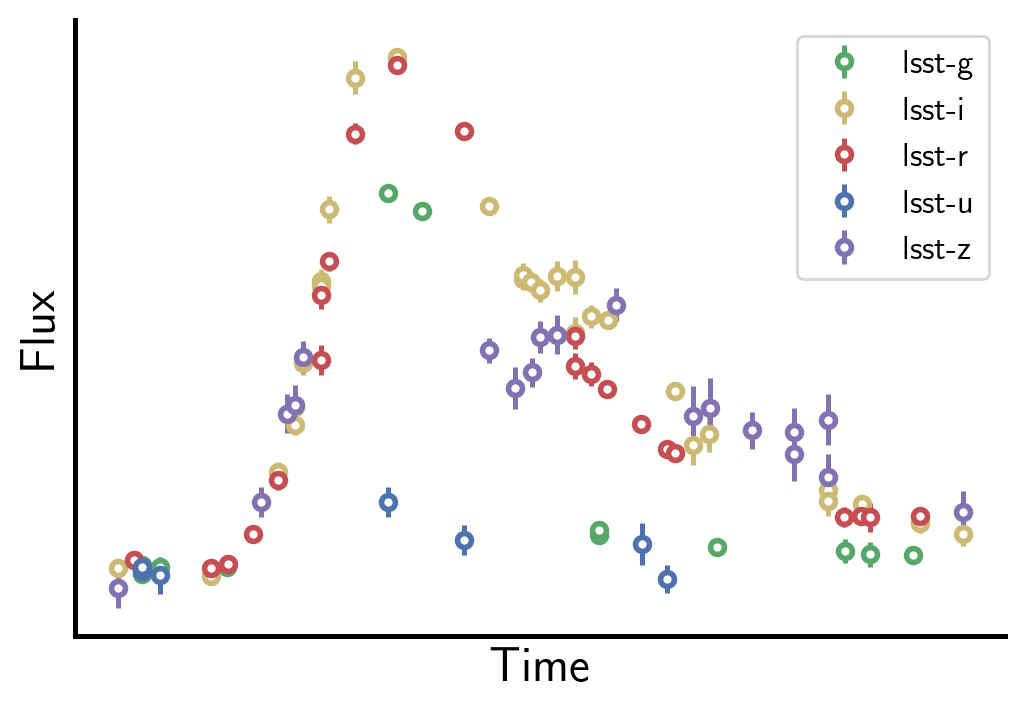

In [162]:
fig, ax = plt.subplots(dpi=200)
for lc in sn.groupby('BAND'):
    cl = None
    band = lc[0].strip()
    if band == 'LSST-g':
        print('SLT')
        cl='C1'
    elif band == 'LSST-r':
        cl='C2'
    elif band == 'LSST-i':
        cl='C4'
    elif band == 'LSST-u':
        cl='C0'
    elif band == 'LSST-z':
        cl='C3'
    ax.errorbar(lc[1].MJD, lc[1].FLUXCAL, yerr=lc[1].FLUXCALERR, fmt='o', mew=2, label=lc[0].lower(), c=cl, mfc='white', ms=5)
    
ax.spines[['right', 'top']].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.legend()
ax.set_ylabel('Flux')
ax.set_xlabel('Time')
plt.savefig('lc.png', dpi=300)

,MJD,BAND,CCDNUM,FIELD,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,PSF_SIG2,...,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,TEXPOSE,GAIN,XPIX,YPIX,SIM_MAGOBS
4,63069.1412,LSST-g,-9,VOID,0,-9.0,-2.025922,3.538038,2.42,0.0,...,15.89,0.0,0.25,31.660000,0.005,0.0,1.0,-9.0,-9.0,99.000000
9,63093.0773,LSST-g,-9,VOID,4096,-9.0,3934.013184,21.242128,3.80,0.0,...,15.68,0.0,0.25,31.629999,0.005,0.0,1.0,-9.0,-9.0,18.520597
18,63118.1403,LSST-g,-9,VOID,4096,-9.0,917.665039,8.811609,3.26,0.0,...,16.09,0.0,0.25,31.450001,0.005,0.0,1.0,-9.0,-9.0,20.093596
